In [98]:
import numpy as np
from scipy.optimize import fsolve

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import warnings

# Classe `compound`

In [99]:
# Initial data
R = 8.314   # J/mol.K
h = 1E-6    # derivative stepsize

In [100]:
class compound:
  records_from_compound = list() 
  """
  Tc: critical temperature
  Pc: critical pressure
  MW: molecular weight
  w: acentric factor
  name: compound's name
  params: a(T), b correction parameters

  """
  def __init__(self, Pc, Tc, MW, w, name):
    Tc=Tc+273.15
    self.Tc = Tc
    self.Pc = Pc
    self.MW = MW
    self.w = w
    self.name = name
    self.params = [(27*(R*Tc)*(R*Tc)/(64*Pc), (R*Tc)/(8*Pc)),         # VdW EoS
                   (0.42748*R*R*(Tc**2.5)/(Pc), 0.08664*R*Tc/Pc),     # RK EoS
                   (0.4278*R*R*Tc*Tc/Pc, 0.0867*R*Tc/Pc),             # SRK EoS
                   (0.45724*R*R*Tc*Tc/Pc, 0.07780*R*Tc/Pc)            # PR EoS
                   ]
    if self not in compound.records_from_compound:
      compound.records_from_compound.append(self)

  # função auxiliar para cálculos
  def saturation_data(self, T_P):
    """
    T_P: temperature and pressure array //
    T:[Kelvin]
    P: [Pascal]

    """
    self.P = list(); self.T = list(); self.g_experimental = list(); self.l_experimental = list()
    for temperature, pressure, l, g in T_P:
      self.P.append(pressure)
      self.T.append(temperature+273.15)   # to Kelvin
      self.l_experimental.append(l*self.MW)
      self.g_experimental.append(g*self.MW)

# Substance Data

In [101]:
Agua = compound(218*101325, 374, 18E-3, 0.3442920843, "Water")
TP = np.array([(0.01, 0.61E3, 0.001000, 206.00),
               (5, 0.87E3,  0.001000, 147.03),
               (10, 1.23E3,  0.001000, 106.32),
               (15, 1.71E3, 0.001001, 77.885),
               (20, 2.34E3, 0.001002, 57.762),
               (25, 3.17E3, 0.001003, 43.340),
               (30, 4.25E3, 0.001004, 32.879),
               (35, 5.63E3, 0.001006, 25.205),
               (40, 7.38E3, 0.001008, 19.515),
               (50, 12.35E3, 0.001012, 12.026),
               (60, 19.95E3, 0.001017, 7.6670),
               (70, 31.20E3, 0.001023, 5.0396),
               (80, 47.41E3,  0.001029, 3.4053),
               (90, 70.18E3, 0.001036, 2.3593),
               (100, 101.42E3, 0.001043, 1.6720),
               (120, 198.67E3, 0.001060, 0.89133),
               (140, 361.54E3, 0.001080, 0.50850),
               (160, 618.23E3, 0.001102, 0.30680),
               (180, 1002.81E3,  0.001127, 0.19384),
               (200, 1554.93E3, 0.001157, 0.12721),
               (220, 2319.60E3, 0.001190, 0.086094),
               (240, 3347.0E3, 0.001229, 0.059707),
               (260, 4692.3E3, 0.001276, 0.042175),
               (280, 6416.60E3, 0.001333, 0.030153),
               (300, 8587.90E3, 0.001404, 0.021659),
               (320, 11284.0E3, 0.001499, 0.015470),
               (340, 14601.0E3, 0.001638, 0.010783),
               (360, 18666.00E3, 0.001895, 0.006950),
               (374, 218*101325, 0.003106, 0.003106)])
Agua.saturation_data(TP)

In [102]:
Propano = compound(42.7E5, 96.85, 44E-3, 0.153, "Propane")
TP = np.array([(-100, 0.02888E5, 1.553E-3, 11.27),
               (-90, 0.06426E5, 1.578E-3, 5.345),
               (-80, 0.1301E5, 1.605E-3, 2.774),
               (-70, 0.2434E5, 1.633E-3, 1.551),
               (-60, 0.4261E5, 1.663E-3, 0.9234),
               (-50, 0.7046E5, 1.694E-3, 0.5793),
               (-40, 1.11E5, 1.728E-3, 0.3798),
               (-30, 1.677E5, 1.763E-3, 0.2585),
               (-20, 2.444E5, 1.802E-3, 0.1815),
               (-10, 3.451E5, 1.844E-3, 0.1309),
               (0, 4.743E5, 1.890E-3, 0.09653),
               (4, 5.349E5, 1.910E-3, 0.08591),
               (8, 6.011E5, 1.931E-3, 0.07666),
               (12, 6.732E5, 1.952E-3, 0.06858),
               (16, 7.515E5, 1.975E-3, 0.06149),
               (20, 8.362E5, 1.999E-3, 0.05525),
               (24, 9.278E5, 2.024E-3, 0.04973),
               (28, 10.27E5, 2.050E-3, 0.04483),
               (32, 11.33E5, 2.078E-3, 0.04048),
               (36, 12.47E5, 2.108E-3, 0.03659),
               (40, 13.69E5, 2.140E-3, 0.03310),
               (44, 15.00E5, 2.174E-3, 0.02997),
               (48, 16.40E5, 2.211E-3, 0.02714),
               (52, 17.89E5, 2.250E-3, 0.02459),
               (56, 19.47E5, 2.293E-3, 0.02227),
               (60, 21.16E5, 2.340E-3, 0.02015),
               (65, 23.42E5, 2.406E-3, 0.01776),
               (70, 25.86E5, 2.483E-3, 0.01560),
               (75, 28.49E5, 2.573E-3, 0.01363),
               (80, 31.31E5, 2.683E-3, 0.01182),
               (85, 34.36E5, 2.827E-3, 0.01011),
               (90, 37.64E5, 3.038E-3, 0.008415),
               (95, 41.19E5, 3.488E-3, 0.006395),
               (96.85, 42.7E5,0.0045, 0.0045)])
Propano.saturation_data(TP)

In [103]:
R134A = compound(4.06E6, 101.05, 102E-3,  0.32684, "R134a")
TP = np.array([(-40, 51.25E3,  0.0007054, 0.36081),
               (-36, 62.95E3, 0.0007112, 0.29751),
               (-32, 76.71E3,  0.0007172, 0.24711),
               (-28, 92.76E3, 0.0007234, 0.20666),
               (-24, 111.37E3, 0.0007297, 0.17395),
               (-20, 132.82E3, 0.0007362, 0.14729),
               (-16, 157.38E3, 0.0007430, 0.12542),
               (-12, 185.37E3, 0.0007499, 0.10736),
               (-8, 217.08E3, 0.0007571, 0.092352),
               (-4, 252.85E3,  0.0007646, 0.079804),
               (0, 293.01E3, 0.0007723, 0.069255),
               (4, 337.90E3, 0.0007804, 0.060338),
               (8, 387.88E3, 0.0007887, 0.052762),
               (12, 443.31E3, 0.0007975, 0.046295),
               (16, 504.58E3, 0.0008066, 0.040748),
               (20, 572.07E3, 0.0008161, 0.035969),
               (24, 646.18E3, 0.0008261, 0.031834),
               (28, 727.31E3, 0.0008366, 0.028242),
               (32, 815.89E3, 0.0008478, 0.025108),
               (36, 912.35E3, 0.0008595, 0.022364),
               (40, 1017.1E3, 0.0008720, 0.019952),
               (44, 1130.7E3, 0.0008854, 0.017824),
               (48, 1253.6E3, 0.0008996, 0.015939),
               (52, 1386.2E3, 0.0009150, 0.014265),
               (56, 1529.1E3, 0.0009317, 0.012771),
               (60, 1682.8E3, 0.0009498, 0.011434),
               (65, 1891.0E3, 0.0009750, 0.009950),
               (70, 2118.2E3, 0.0010037, 0.008642),
               (75, 2365.8E3, 0.0010372, 0.007480),
               (80, 2635.3E3, 0.0010772, 0.006436),
               (85, 2928.2E3, 0.0011270, 0.005486),
               (90, 3246.9E3, 0.0011932, 0.004599),
               (95, 3594.1E3, 0.0012933, 0.003726),
               (100, 3975.1E3, 0.0015269, 0.002630),
               (101.05, 4.06E6, 1.94E-3, 1.94E-3),])
R134A.saturation_data(TP)

In [104]:
Amonia = compound(113.57E5, 132.41, 17E-3, 0.256, "Ammonia")
TP = np.array([(-40, 71.66E3, 1/690.2, 1/0.6435),
               (-30, 119.4E3, 1/677.8, 1/1.037),
               (-25, 151.5E3, 1/671.5, 1/1.296),
               (-20, 190.1E3, 1/665.1, 1/1.603),
               (-15, 236.2E3,  1/658.6, 1/1.966),
               (-10, 290.8E3,  1/652.1, 1/2.391),
               (-5, 354.9E3, 1/645.4, 1/2.886),
               (0, 429.6E3,  1/638.6, 1/3.458),
               (5, 516.0E3, 1/631.7, 1/4.116),
               (10, 615.3E3, 1/624.6, 1/4.870),
               (15, 728.8E3, 1/617.5, 1/5.729),
               (20, 857.8E3, 1/610.2, 1/6.705),
               (25, 1003E3, 1/602.8, 1/7.809),
               (30, 1167E3, 1/595.2, 1/9.055),
               (35, 1351E3, 1/587.4, 1/10.46),
               (40, 1555E3, 1/579.4, 1/12.03),
               (45, 1782E3, 1/571.3, 1/13.8),
               (50, 2033E3, 1/562.9, 1/15.78),
               (55, 2310E3, 1/554.2, 1/18.00),
               (60, 2614E3, 1/545.2, 1/20.48),
               (65, 2948E3, 1/536.0, 1/23.26),
               (70, 3312E3, 1/526.3, 1/26.39),
               (75, 3709E3, 1/516.2, 1/29.90),
               (80, 4141E3, 1/505.7, 1/33.87),
               (85, 4609E3, 1/494.5, 1/38.36),
               (90, 5116E3, 1/482.8, 1/43.48),
               (95, 5665E3, 1/470.2, 1/49.35),
               (100, 6257E3, 1/456.6, 1/56.15),
               (132.41, 113.57E5, 0.00410, 0.00410)])
Amonia.saturation_data(TP)

In [105]:
print(Propano.params[:])

[(0.934930663037178, 9.005210772833723e-05), (18.222681149899813, 6.24169169086651e-05), (0.9480612447936112, 6.246014192037471e-05), (1.013304169166505, 5.60484318501171e-05)]


# Determine Roots

## Van der Walls
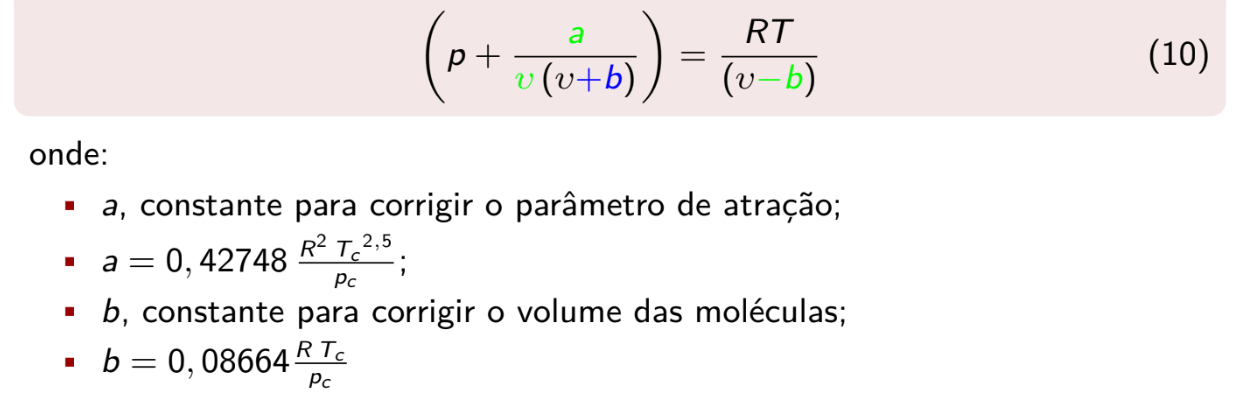

In [106]:
def Van_der_Walls_pol(molar_volume, row_it, substance):
  a,b = substance.params[0]
  p_Vdw = substance.P[row_it]*(molar_volume**2)*(molar_volume-b) + a*(molar_volume-b) - R*substance.T[row_it]*(molar_volume**2)
  return p_Vdw

def dVdWdV(molar_volume, row_it, substance):
  return (Van_der_Walls_pol(molar_volume+h, row_it, substance) - Van_der_Walls_pol(molar_volume-h, row_it, substance))/(2*h)

## Redlich-Kwong
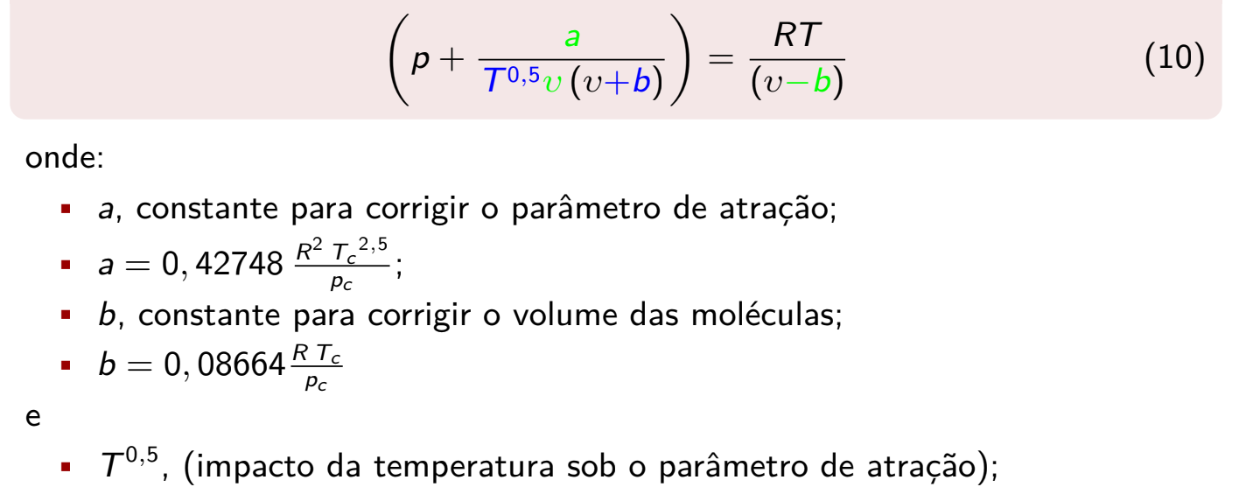

In [107]:
def Redlich_Kwong_pol(molar_volume, row_it, substance):
  a,b = substance.params[1]
  p_RK = substance.P[row_it]*(molar_volume*(molar_volume+b))*(molar_volume-b)*((substance.T[row_it])**0.5)	  \
       + a*(molar_volume-b)							                                                                      \
       - R*substance.T[row_it]*(molar_volume*(molar_volume+b))*((substance.T[row_it])**0.5)
  return p_RK

def dRKdV(molar_volume, row_it, substance):
  return (Redlich_Kwong_pol(molar_volume+h, row_it, substance) - Redlich_Kwong_pol(molar_volume-h, row_it, substance))/(2*h)

## Soave-Redlich-Kwong
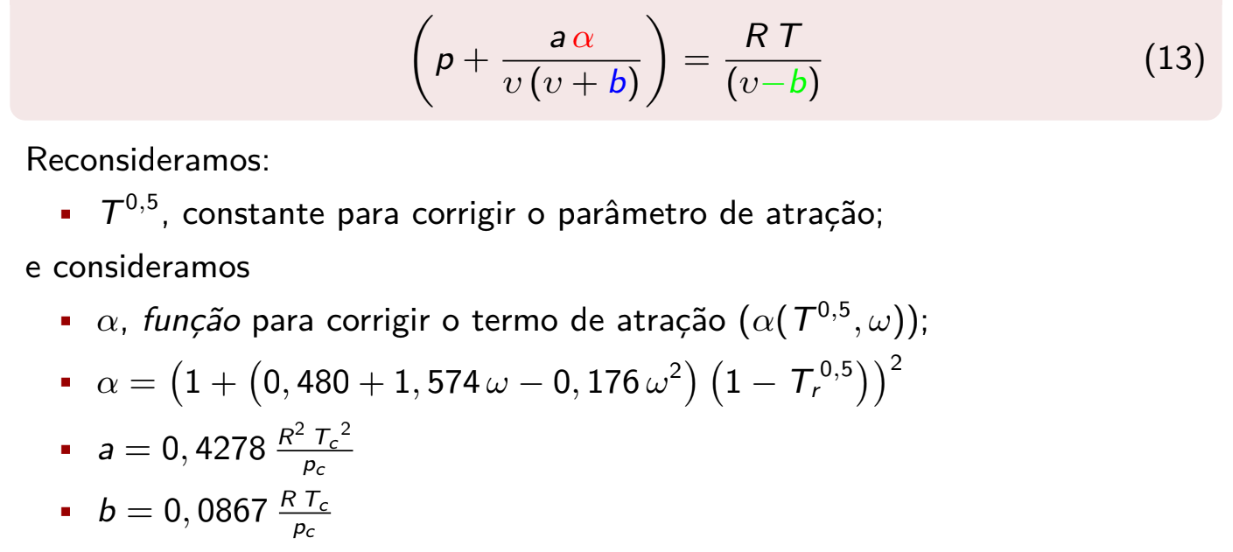

In [108]:
def Soave_Redlich_Kwong_pol(molar_volume, row_it, substance):
  a,b = substance.params[2]
  α = 1+(0.480 + 1.574*substance.w - 0.176*(substance.w**2))*((1-((substance.T[row_it]/substance.Tc)**0.5)))**2
  p_SRK = substance.P[row_it]*(molar_volume*(molar_volume+b))*(molar_volume-b)	\
       + a*(molar_volume-b)*α							                                  \
       - R*substance.T[row_it]*(molar_volume*(molar_volume+b))
  return p_SRK

def dSRKdV(molar_volume, row_it, substance):
  return (Soave_Redlich_Kwong_pol(molar_volume+h, row_it, substance) - Soave_Redlich_Kwong_pol(molar_volume-h, row_it, substance))/(2*h)

## Peng-Robinson
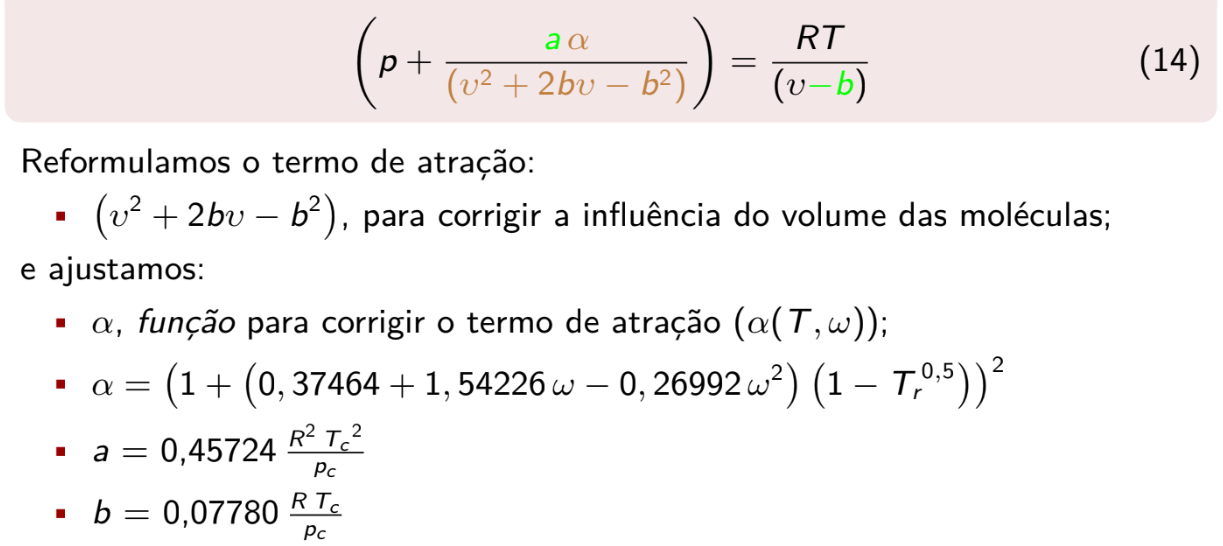

In [109]:
def Peng_Robinson_pol(molar_volume, row_it, substance):
  a,b = substance.params[3]
  α = (1+(0.37464 + 1.54226*substance.w - 0.269962*(substance.w**2))*(1-((substance.T[row_it]/substance.Tc)**0.5)))**2
  p_PR = substance.P[row_it]*(molar_volume**2 + 2*b*molar_volume - b**2)*(molar_volume-b)           \
        + a * α * (molar_volume-b)                                                                  \
        - R*substance.T[row_it]*(molar_volume**2 + 2*b*molar_volume - b**2)
  return p_PR

def dPRdV(molar_volume, row_it, substance):
  return (Peng_Robinson_pol(molar_volume+h, row_it, substance) - Peng_Robinson_pol(molar_volume-h, row_it, substance))/(2*h)

# Solving

In [110]:
# first five iteration: Van der Walls - Agua
for i in range(0,5):
  res = fsolve(Van_der_Walls_pol, [4, 1E-6], (i, Agua))
  print(f'It. {i} Água:\n{res}\n')

It. 0 Água:
[3.72282344e+00 3.56735621e-05]

It. 1 Água:
[2.65788227e+00 3.58130974e-05]

It. 2 Água:
[1.91370540e+00 3.59501728e-05]

It. 3 Água:
[1.40078156e+00 3.60914436e-05]

It. 4 Água:
[1.04136300e+00 3.62354465e-05]



In [111]:
# first five iteration: Peng Robinson - Propane
for i in range(0,5):
  res = fsolve(Peng_Robinson_pol, [4, 1E-6], (i, Propano))
  print(f'It. {i} Propane:\n{res}\n')

It. 0 Propane:
[4.97521950e-01 6.42514787e-05]

It. 1 Propane:
[2.36088709e-01 6.51278311e-05]

It. 2 Propane:
[1.22623100e-01 6.60815853e-05]

It. 3 Propane:
[6.86382716e-02 6.71231773e-05]

It. 4 Propane:
[4.08852897e-02 6.82651377e-05]



# Plotting
To see how well does all the EoS perform for each compound.

## Performance EoS *versus* Experimental

In [116]:
def plotting_eos(EoS):
  fig, ax = plt.subplots(2,2, figsize=(10,10))
  plt.subplots_adjust(left=.1,
                      bottom=.1,
                      right=1.,
                      top=.9,
                      wspace=.3,
                      hspace=.5)

  name = {
      'Van der Walls':Van_der_Walls_pol,
      'Redlich Kwong':Redlich_Kwong_pol,
      'Soave-Redlich Kwong':Soave_Redlich_Kwong_pol,
      'Peng Robinson':Peng_Robinson_pol
  }

  alignment=0

  for compounds in compound.records_from_compound:    
    pressure_gas_phase = list()
    pressure_liquid_phase = list()
    P = list()
    for it in range(len(compounds.P)):                # solve for pressure
      gas, liq = fsolve(name[EoS], [4,1e-6], (it, compounds))     
      if (gas/liq > 1.1):   # make sure the roots from vapor and liquid are different
        pressure_gas_phase.append(gas)
        pressure_liquid_phase.append(liq)
        P.append(compounds.P[it])

    ax[alignment//2][alignment%2].plot(pressure_gas_phase, np.array(P)/1E5, label="Saturated Vapor (Calculated)",
                                       color='tab:cyan', alpha=.5, lw=1.5, linestyle='solid')
    ax[alignment//2][alignment%2].plot(compounds.g_experimental, np.array(compounds.P)/1E5, label="Saturated Vapor (Experimental)",
                                       color='tab:blue', alpha=.8, lw=2., linestyle='dotted')

    ax[alignment//2][alignment%2].plot(pressure_liquid_phase, np.array(P)/1E5, label="Saturated Liquid (Calculated)",
                                       color='tab:olive', alpha=.5, lw=1.5, linestyle='solid')
    ax[alignment//2][alignment%2].plot(compounds.l_experimental, np.array(compounds.P)/1E5, label="Saturated Liquid (Experimental)",
                                       color='tab:green', alpha=.8, lw=2., linestyle='dotted')

    ax[alignment//2][alignment%2].set_xscale("log")
    ax[alignment//2][alignment%2].set_yscale("linear")
    ax[alignment//2][alignment%2].set_ylabel("P(bar)")
    ax[alignment//2][alignment%2].set_xlabel("V (m³/mol)")
    ax[alignment//2][alignment%2].set_title(compounds.name)
    alignment+=1

  handles, labels = ax[0][0].get_legend_handles_labels()
  fig.legend(handles, labels, loc='upper center')
  plt.show()

interact(plotting_eos, EoS=["Van der Walls", "Redlich Kwong", "Soave-Redlich Kwong", "Peng Robinson"]);

interactive(children=(Dropdown(description='EoS', options=('Van der Walls', 'Redlich Kwong', 'Soave-Redlich Kw…

## Spinodal

In [117]:
def plotting_spinodal(EoS):
  fig, ax = plt.subplots(2,2, figsize=(10,10))
  plt.subplots_adjust(left=.1,
                      bottom=.1,
                      right=1.,
                      top=.9,
                      wspace=.3,
                      hspace=.5)
  fun = {
      'Van der Walls': Van_der_Walls_pol,
      'Redlich Kwong': Redlich_Kwong_pol,
      'Soave-Redlich Kwong': Soave_Redlich_Kwong_pol,
      'Peng Robinson': Peng_Robinson_pol

  }

  derivative_fun = {
      'Van der Walls': dVdWdV,
      'Redlich Kwong': dRKdV,
      'Soave-Redlich Kwong': dSRKdV,
      'Peng Robinson': dPRdV
  }

  alignment=0
  for compounds_dev in compound.records_from_compound:
    pressure_gas_phase = list()
    pressure_liquid_phase = list()
    spinodal_gas_phase = list()
    spinodal_liquid_phase = list()
    P = list()

    for it in range(len(compounds_dev.P)):
      gas, liq = fsolve(fun[EoS], [4, 1E-6], (it, compounds_dev))
      dg,dl = fsolve(derivative_fun[EoS], [4, 1E-6], (it, compounds_dev))
      if (gas/liq > 1.1):
        pressure_gas_phase.append(gas)
        pressure_liquid_phase.append(liq)
        spinodal_gas_phase.append(dg)
        spinodal_liquid_phase.append(dl)

        # Tie lines
        T = compounds_dev.T[it] - 273.15
        if (T%20 == 0):
          ax[alignment//2][alignment%2].plot([liq, gas], np.array([compounds_dev.P[it], compounds_dev.P[it]])/1E2, 'magenta')

        P.append(compounds_dev.P[it])

    ax[alignment//2][alignment%2].plot(pressure_gas_phase, np.array(P)/1E2, label='Saturated Vapor (Calculated)',
                                       color='tab:blue', linestyle='solid')

    ax[alignment//2][alignment%2].plot(spinodal_gas_phase, np.array(P)/1E2, label='Spinodal Curve',
                                       color='k', linestyle='dashed')

    ax[alignment//2][alignment%2].plot(pressure_liquid_phase, np.array(P)/1E2, label='Saturated Liquid (Calculated)',
                                       color='tab:olive', linestyle='solid')
    ax[alignment//2][alignment%2].plot(spinodal_liquid_phase, np.array(P)/1E2,
                                       color='k', linestyle='dashed')

    ax[alignment//2][alignment%2].set_xscale('log')
    ax[alignment//2][alignment%2].set_yscale('log')
    ax[alignment//2][alignment%2].set_ylabel("P(bar)")
    ax[alignment//2][alignment%2].set_xlabel("V (m³/mol)")
    ax[alignment//2][alignment%2].set_title(f'{compounds_dev.name}')
    alignment+=1

  handles, labels = ax[0][0].get_legend_handles_labels()
  fig.legend(handles, labels, loc="center")
  plt.show()

warnings.filterwarnings('ignore', category=UserWarning)

interact(plotting_spinodal, EoS=["Van der Walls", "Redlich Kwong", "Soave-Redlich Kwong", "Peng Robinson"]);

interactive(children=(Dropdown(description='EoS', options=('Van der Walls', 'Redlich Kwong', 'Soave-Redlich Kw…

# Comments

1. EoS modelling:
* VdW:
    * As expeceted, VdW EoS isn't powerful enough to depict polar substances ($H_2O$ and $NH_3$), as well as non-polar substances **in liquid phase**.
    * However, at the vapor phase it seems to be a little bit more appropriate enabling the curve up until the last experimental point available.
    * Furthermore, an interpolation happens at last experimental point to the critical point of the substance (spikes in the curve).
* RK and SRK:
    * From the the plots the *RK* is better at featuring the substances when compared to *SRK* EoS for all substances.
    * *SRK* is better at predicting "bigger" substances (longer carbon chains), and due to the *shape factor* of these molecules not being notable ($ω_{H_2O}$ ~ 0.344, $\;\;ω_{CH_3(CH_2)_{10}CH_3}$ ~ 0.571) it performs worse than *RK*.
    * Curiously, the *RK* presents a good fit to polar substances ($H_2O$ e $NH_3$) given its notorious ability to feature non-polar substances (hydrocarbons).

* PR:
    * The best model when compared to the others when it comes to depicting substance bahaviour.
    * As expected, is able to feature all substances at a long range of pressure and molar volume.
    * In contrast with former EoSs, it's able to predict substance behaviour in the region near the *critical point* and it shrinks interpolation at high pressures, presenting more precision and safety for processes operationg this region.

2. *Metastability* Modelling:
Achieved the purpose of the exercise, but presented instabilities near the critical point region. However, depending on the EoS chosen this modelling instability was minimized.